### 1. **Goal for the project**
  - to create an ''Classification'' model using supervised learing algorithm
  - Example dataset ---> 'Heart_disease_dataset.csv'
  - Total rows: 1000
  - Target Feature: "Heart Disease"
  - We are creating an ML model using the dataset and any suitable **Supervised Learning Algorithm** (Classification)

### 2. **Collect the dataset**
    - the dataset "Heart_disease_dataset.csv" is downloaded and collected form Kaggle
    - using pandas to improt and load the dataset for further operations. 

In [198]:
import pandas as pd
df = pd.read_csv('heart_disease_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

### 3. Prepare the Dataset

In [199]:
new_column_list = []
for name in df.columns:
    temp_name = name.lower().replace(" ", "_")
    new_column_list.append(temp_name)
df.columns = new_column_list
df.columns

Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'family_history',
       'diabetes', 'obesity', 'stress_level', 'blood_sugar',
       'exercise_induced_angina', 'chest_pain_type', 'heart_disease'],
      dtype='object')

In [200]:
df = df.drop(columns='alcohol_intake')

In [201]:
 #df["gender"] = df.gender.map({"Female": 0, "Male": 1})
 gender_map = {
    'Female':0, 'Male':1 
 }
 df["gender"] = df.gender.map(gender_map)

 chest_pain_map = {
    'Asymptomatic': 0,
    'Non-anginal Pain': 1,
    'Atypical Angina' : 2,
    'Typical Angina' : 3 }
df["chest_pain_type"] = df.chest_pain_type.map(chest_pain_map)


smoking_map = {
	'Never': 0,
	'Former': 1,
	'Current': 2
}
df['smoking'] = df['smoking'].map(smoking_map)

yes_no_map = {
    'No' : 0,
    'Yes' : 1
}
df["family_history"] = df.family_history.map(yes_no_map).fillna(0)
df['obesity'] = df.obesity.map(yes_no_map).fillna(0)
df['diabetes'] = df.diabetes.map(yes_no_map).fillna(0)
df["exercise_induced_angina"] = df.exercise_induced_angina.map(yes_no_map).fillna(0)

In [202]:
df.head()

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,2,1,0,0,1,8,119,1,2,1
1,48,1,204,165,62,2,5,0,0,0,9,70,1,3,0
2,53,1,234,91,67,0,3,1,0,1,5,196,1,2,1
3,69,0,192,90,72,2,4,0,1,0,7,107,1,1,0
4,62,0,172,163,93,0,6,0,1,0,2,183,1,0,0


In [203]:
df['heart_disease'].value_counts()

heart_disease
0    608
1    392
Name: count, dtype: int64

### 4. **Feature Engineering**
- Used heat map to understand the correlationn between the variables

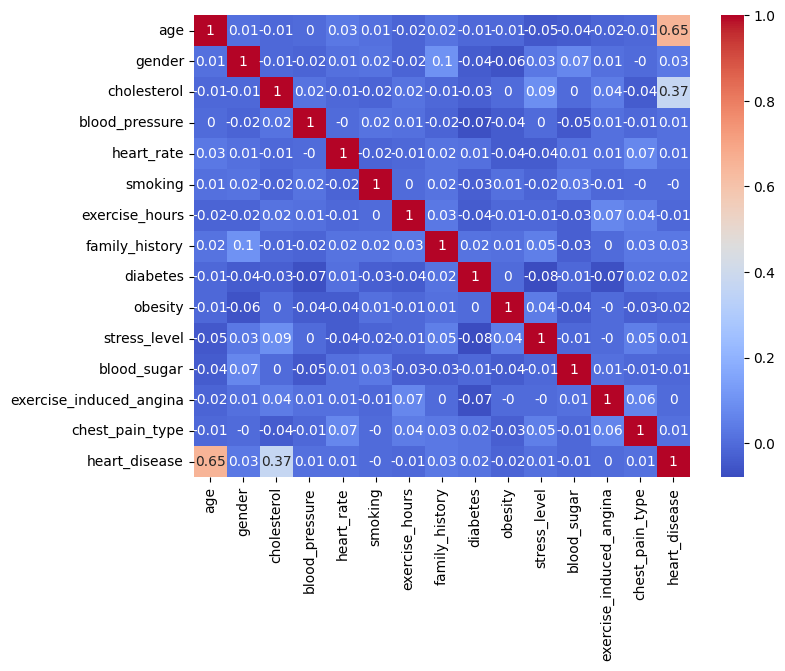

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlations = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations.round(2), annot=True, cmap="coolwarm")
plt.show()

### Inferences from the heat map
   - there is a noticable correlation between heart disesase(target feature) with age [0.6] and cholesterol[0.4].
   - they might be the decision factors for prediction
   - however there are some other features like, heart_rate, blood_pressure, obesity etc.
   - I carried out two types of models to study which has more effect in prediciting the target.

In [205]:
new_df = df[["age", "cholesterol", "heart_disease"]]

### 5. **Split Dataset for "training" and "testing"**

In [206]:
from sklearn.model_selection import train_test_split
mldata_split_output = train_test_split(df, test_size=0.2, random_state=42)  
mldata_split_output_1 = train_test_split(new_df, test_size=0.2, random_state=42)


train_data = mldata_split_output[0]
print(len(mldata_split_output[0]))

test_data = mldata_split_output[1]
print(len(mldata_split_output[1]))

train_data_1 = mldata_split_output_1[0]
print(len(mldata_split_output_1[0]))

test_data_1 = mldata_split_output_1[1]
print(len(mldata_split_output_1[1]))

800
200
800
200


In [207]:
mldata_split_output[0]

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
29,79,1,319,115,63,0,0,1,0,1,9,95,0,3,1
535,38,0,340,176,98,2,5,0,0,0,1,155,1,1,0
695,62,1,213,141,93,2,2,0,1,0,6,158,1,1,1
557,34,1,338,104,83,0,9,1,1,1,7,105,0,1,0
836,57,0,185,126,94,0,1,0,1,0,5,106,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,61,0,311,128,87,1,7,0,0,1,1,74,1,0,1
270,44,1,197,135,85,1,2,1,0,1,4,111,1,0,0
860,31,0,194,131,91,0,1,1,1,0,10,186,1,1,0
435,58,0,259,148,94,2,6,0,0,0,6,164,1,1,1


In [208]:
mldata_split_output[1]

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
521,77,0,248,96,72,2,2,0,1,1,9,97,0,0,1
737,42,1,293,143,80,0,6,1,0,1,10,127,0,1,0
740,42,0,206,127,97,2,2,1,1,1,4,163,0,3,0
660,40,0,288,101,84,0,9,1,1,0,7,153,1,1,0
411,78,0,213,119,99,2,2,0,0,1,3,177,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,48,0,348,137,99,1,1,1,1,0,7,169,1,3,0
332,44,0,320,99,82,0,5,0,0,0,8,101,0,2,0
208,58,1,317,174,65,0,8,0,0,0,6,173,1,2,1
613,41,1,167,114,82,2,8,0,1,1,5,180,1,1,0


In [209]:
mldata_split_output_1[0]

,age,cholesterol,heart_disease
29,79,319,1
535,38,340,0
695,62,213,1
557,34,338,0
836,57,185,0
...,...,...,...
106,61,311,1
270,44,197,0
860,31,194,0
435,58,259,1


In [210]:
mldata_split_output_1[1]

,age,cholesterol,heart_disease
521,77,248,1
737,42,293,0
740,42,206,0
660,40,288,0
411,78,213,1
...,...,...,...
408,48,348,0
332,44,320,0
208,58,317,1
613,41,167,0


#### **6 Applying ML algorithm to the training data to Create a model**

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

model1 = DecisionTreeClassifier(max_depth=5).fit(X=train_data.drop(columns=["heart_disease"]), y=train_data["heart_disease"])
model2 = SVC().fit(X=train_data.drop(columns=["heart_disease"]), y=train_data["heart_disease"])
model3 = RandomForestClassifier().fit(X = train_data.drop(columns=["heart_disease"]), y = train_data["heart_disease"])
model4 = AdaBoostClassifier().fit(X = train_data.drop(columns=["heart_disease"]), y = train_data["heart_disease"])


In [212]:
model_1 = DecisionTreeClassifier(max_depth=5).fit(X=train_data_1.drop(columns=["heart_disease"]), y=train_data_1["heart_disease"])
model_2 = SVC().fit(X=train_data_1.drop(columns=["heart_disease"]), y=train_data_1["heart_disease"])
model_3 = RandomForestClassifier().fit(X = train_data_1.drop(columns=["heart_disease"]), y = train_data_1["heart_disease"])
model_4 = AdaBoostClassifier().fit(X = train_data_1.drop(columns=["heart_disease"]), y = train_data_1["heart_disease"])

#### **7 Evalute the "model" with the "testing" data ---> Make "prediction"**

In [213]:
y_predicted_model1 = model1.predict(X = test_data.drop(columns=["heart_disease"]))
y_predicted_model2 = model2.predict(X = test_data.drop(columns=["heart_disease"]))
y_predicted_model3 = model3.predict(X = test_data.drop(columns=["heart_disease"]))
y_predicted_model4 = model4.predict(X = test_data.drop(columns=["heart_disease"]))

In [214]:
y_predicted_model_1 = model_1.predict(X = test_data_1.drop(columns=["heart_disease"]))
y_predicted_model_2 = model_2.predict(X = test_data_1.drop(columns=["heart_disease"]))
y_predicted_model_3 = model_3.predict(X = test_data_1.drop(columns=["heart_disease"]))
y_predicted_model_4 = model_4.predict(X = test_data_1.drop(columns=["heart_disease"]))

In [215]:
y_true = test_data["heart_disease"]
y_true_1 = test_data_1["heart_disease"]

#### **8 Prediction results summary study - Metrics**

In [216]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_predicted_model1).ravel()
print("------------------------")
print("Confusion Matrix output - model-1 (DecisionTreeClassifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

tn, fp, fn, tp = confusion_matrix(y_true, y_predicted_model2).ravel()
print("------------------------")
print("Confusion Matrix output - model-2 (SVC - Support Vector Classifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

tn, fp, fn, tp = confusion_matrix(y_true, y_predicted_model3).ravel()
print("------------------------")
print("Confusion Matrix output - model-3 (RandomForestClassifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

tn, fp, fn, tp = confusion_matrix(y_true, y_predicted_model4).ravel()
print("------------------------")
print("Confusion Matrix output - model-4 (AdaBoostClassifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

------------------------
Confusion Matrix output - model-1 (DecisionTreeClassifier)
------------------------
tn - True Negative 118
fp - False Positive 0
fn - False Negative 0
tp - True Positive 82
------------------------
Confusion Matrix output - model-2 (SVC - Support Vector Classifier)
------------------------
tn - True Negative 115
fp - False Positive 3
fn - False Negative 10
tp - True Positive 72
------------------------
Confusion Matrix output - model-3 (RandomForestClassifier)
------------------------
tn - True Negative 118
fp - False Positive 0
fn - False Negative 0
tp - True Positive 82
------------------------
Confusion Matrix output - model-4 (AdaBoostClassifier)
------------------------
tn - True Negative 118
fp - False Positive 0
fn - False Negative 0
tp - True Positive 82


In [217]:
tn, fp, fn, tp = confusion_matrix(y_true_1, y_predicted_model_1).ravel()
print("------------------------")
print("Confusion Matrix output - model-1 (DecisionTreeClassifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

tn, fp, fn, tp = confusion_matrix(y_true_1, y_predicted_model_2).ravel()
print("------------------------")
print("Confusion Matrix output - model-2 (SVC - Support Vector Classifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

tn, fp, fn, tp = confusion_matrix(y_true_1, y_predicted_model_3).ravel()
print("------------------------")
print("Confusion Matrix output - model-3 (RandomForestClassifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

tn, fp, fn, tp = confusion_matrix(y_true_1, y_predicted_model_4).ravel()
print("------------------------")
print("Confusion Matrix output - model-4 (AdaBoostClassifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)


------------------------
Confusion Matrix output - model-1 (DecisionTreeClassifier)
------------------------
tn - True Negative 118
fp - False Positive 0
fn - False Negative 0
tp - True Positive 82
------------------------
Confusion Matrix output - model-2 (SVC - Support Vector Classifier)
------------------------
tn - True Negative 116
fp - False Positive 2
fn - False Negative 5
tp - True Positive 77
------------------------
Confusion Matrix output - model-3 (RandomForestClassifier)
------------------------
tn - True Negative 118
fp - False Positive 0
fn - False Negative 0
tp - True Positive 82
------------------------
Confusion Matrix output - model-4 (AdaBoostClassifier)
------------------------
tn - True Negative 118
fp - False Positive 0
fn - False Negative 0
tp - True Positive 82


In [218]:
test_data["heart_disease"].value_counts()

heart_disease
0    118
1     82
Name: count, dtype: int64

In [219]:
TN=118 ; FP=0 ; FN=0 ; TP=82

accuracy = round((TP+TN) / (TP+TN+FP+FN), 2)
precision = round(TP / (TP + FP), 2)
recall = round(TP / (TP + FN), 2)
F1_score = round((2 * TP) / ((2 * TP) + FP + FN), 2)

print(f"DecisionTreeClassifier metrics")
print(f"Model-1 \nmetrics --> Accuracy:{accuracy} | Precision:{precision} | Recall:{recall} | F1 score:{F1_score}")

print(f"\nRandomForestClassifier metrics")
print(f"Model-3 \nmetrics --> Accuracy:{accuracy} | Precision:{precision} | Recall:{recall} | F1 score:{F1_score}")

print(f"\nAdaBoostClassifier metrics")
print(f"Model-4 \nmetrics --> Accuracy:{accuracy} | Precision:{precision} | Recall:{recall} | F1 score:{F1_score}")

TN=115 ; FP=3 ; FN=10 ; TP=72

accuracy = round((TP+TN) / (TP+TN+FP+FN), 2)
precision = round(TP / (TP + FP), 2)
recall = round(TP / (TP + FN), 2)
F1_score = round((2 * TP) / ((2 * TP) + FP + FN), 2)
print("--------------------------------")
print(f"\nSVC metrics")
print(f"Model-2 \nmetrics --> Accuracy:{accuracy} | Precision:{precision} | Recall:{recall} | F1 score:{F1_score}")

TN=116 ; FP=2 ; FN=5 ; TP=77

accuracy = round((TP+TN) / (TP+TN+FP+FN), 2)
precision = round(TP / (TP + FP), 2)
recall = round(TP / (TP + FN), 2)
F1_score = round((2 * TP) / ((2 * TP) + FP + FN), 2)
print("--------------------------------")
print(f"\nSVC metrics - with features age and cholesterol")
print(f"Model-2 \nmetrics --> Accuracy:{accuracy} | Precision:{precision} | Recall:{recall} | F1 score:{F1_score}")

DecisionTreeClassifier metrics
Model-1 
metrics --> Accuracy:1.0 | Precision:1.0 | Recall:1.0 | F1 score:1.0

RandomForestClassifier metrics
Model-3 
metrics --> Accuracy:1.0 | Precision:1.0 | Recall:1.0 | F1 score:1.0

AdaBoostClassifier metrics
Model-4 
metrics --> Accuracy:1.0 | Precision:1.0 | Recall:1.0 | F1 score:1.0
--------------------------------

SVC metrics
Model-2 
metrics --> Accuracy:0.94 | Precision:0.96 | Recall:0.88 | F1 score:0.92
--------------------------------

SVC metrics - with features age and cholesterol
Model-2 
metrics --> Accuracy:0.96 | Precision:0.97 | Recall:0.94 | F1 score:0.96


### **Final Inferences**
1. Decision Tree, Random Forest, and AdaBoost all three models achieve a perfect 1.0 in accuracy, precision, recall, and F1-score.
    - this may be due to less data.
    - less data makes it easier for the model to predict the results.

2. Support Vector Classifier (SVC) Shows Better Generalization
    - Accuracy: 94% with high precision (96%) and recall (88%).
    - this is expected in real-world scenarios.

3. Support Vector Classifier (SVC) Shows even more  Better Generalization while choosing the "age" and "cholesterol"
   - Accuracy: 96% with high precision (97%) and recall (94%).
   - it must have handled better since the features is less and precise.
   - thus model 2 ---> SVC performs well here